In [1]:
import aniensemblestats as aes
import hdnntools as hdt
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

import numpy as np


import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#errdir = '/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/arch_l2/error_stats/'
errdir = '/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/'
#errdir = '/home/jsmith48/scratch/ANI-2x_retrain/error_stats/COMP6v1_all/'
#errdir = '/home/jsmith48/scratch/ANI-2x_retrain/error_stats/temp_scale/'
#errdir = '/home/jujuman/Research/DataReductionMethods/train_test/error_compare/'
#tex_store = "/home/jsmith48/scratch/ANI-2x_retrain/error_stats/COMP6v1_all/AllTests_results_mean.tex"
#xls_store = "/home/jsmith48/scratch/ANI-2x_retrain/error_stats/COMP6v1_all/AllTests_results_mean.xlsx"
#tex_store = "/home/jsmith48/scratch/ANI-2x_retrain/error_stats/COMP6v1_all/AllTests_results.tex"

#errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/emax_compare/'
#tex_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/Emax_results_mean.tex"
#xls_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/Emax_results_mean.xlsx"

#errdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/error_compare/'

#errdir = '/home/jujuman/Research/DataReductionMethods/train_test/error_compare/'
#tex_store = "/home/jujuman/Research/DataReductionMethods/al_working_network/tables/AllTests_results_mean.tex"
#xls_store = "/home/jujuman/Research/DataReductionMethods/al_working_network/tables/AllTests_results_mean.xlsx"

efiles = [errdir+f for f in os.listdir(errdir)]
tsname = [
#            'TriPep    (S)',
#            'TriPep (CHNO)',
#            'DrugBk (SFCl)',
#            'DrugBk (CHNO)',
#            'GDB-07to09 (SFCl)',
#            'GDB-10to11 (SFCl)',
#            'GDB07to09 (CHNO)',
#            'GDB10to13 (CHNO)',
#            'MDBenchmark',
#            's66x8',
          #'r10_ccsd',
#           'GDB-10to13',
         'DrugBank',
         'Tripeptide',
         'GDB07to09',
         'MDBenchmark',
         'GDB10to13',
         's66x8',
         ]

'''
efiles = [errdir+f for f in os.listdir(errdir)]
tsname = ['DrugBk (SFCl)',
          'DrugBk (CHNO)',
          'GDB-07 (SFCl)',
          'GDB-08 (SFCl)',
          'GDB-09 (SFCl)',
          'GDB-10 (SFCl)',
          'GDB-11 (SFCl)',
          'GDB-07 (CHNO)',
          'GDB-08 (CHNO)',
          'GDB-09 (CHNO)',
          'GDB-10 (CHNO)',
          'GDB-11 (CHNO)',
         ]
'''

for i in efiles:
    print(i)

/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_03-01.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_03-05.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_02-02.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_03-02.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_03-04.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_02-05.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_05-03.h5
/home/jsmith48/scratch/ccsd_extrapolation/hp_search_darwin/hp_ani-1x/ani_1x-dhl-hpsearch2/error_stats/tsdata_model_02-01.h5
/home/js

In [3]:
eed = aes.evaluate_ensemble_data(efiles)

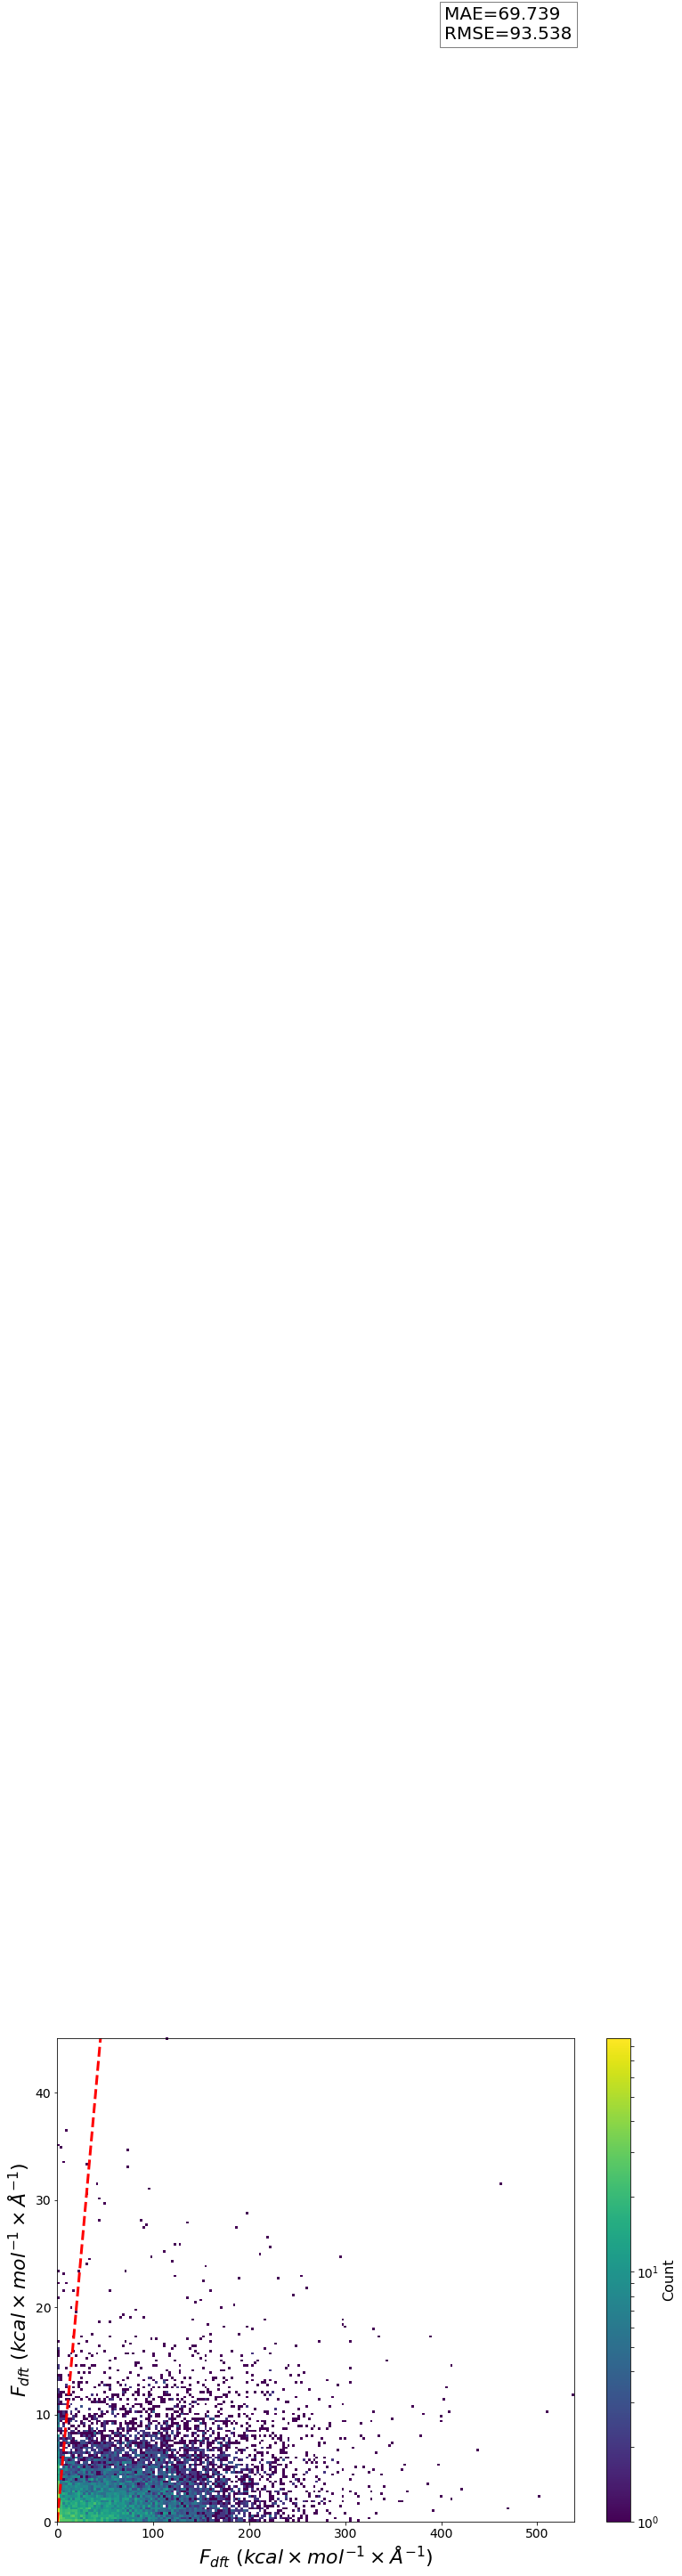

In [4]:
aes.plot_corr_dist(hdt.hatokcal*eed.fdata['model_05-03']['DrugBank']['Erel'],
            np.abs(eed.fdata['model_05-03']['DrugBank']['Eani'][0]-eed.fdata['model_05-03']['DrugBank']['Edft']),inset=False)

In [5]:
#eed.get_ntwrk_error_table('ANI-2x-1')

In [6]:
#eed.get_ntwrk_error_table('ANI-2x_3')

# ANI-1x trained to different datasets tested for extensibility

In [7]:
tb = eed.get_totalerror_table() # All errors combined

In [8]:
meanMAE = np.mean(np.stack([tb['$\Delta$E$_\mathrm{MAE}$$\mu$'].values,
                            tb['E$_\mathrm{MAE}$$\mu$'].values,
                            tb['F$_\mathrm{MAE}$$\mu$'].values]),axis=0)

tb['MeanMAE'] = meanMAE

meanRMS = np.mean(np.stack([tb['$\Delta$E$_\mathrm{RMS}$$\mu$'].values,
                            tb['E$_\mathrm{RMS}$$\mu$'].values,
                            tb['F$_\mathrm{RMS}$$\mu$'].values]),axis=0)

tb['MeanRMS'] = meanRMS

tb['TotalMean'] = np.mean([meanMAE,meanRMS],axis=0)

In [9]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm = ListedColormap(sns.color_palette("Greens"))

(tb.style
  .background_gradient(cmap=cm, subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                                        '$\Delta$E$_\mathrm{RMS}$$\mu$',
                                        'E$_\mathrm{MAE}$$\mu$',
                                        'E$_\mathrm{RMS}$$\mu$',
                                        'F$_\mathrm{MAE}$$\mu$',
                                        'F$_\mathrm{RMS}$$\mu$',
                                        'MeanRMS',
                                        'MeanMAE',
                                        'TotalMean'])
  .highlight_min(subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                         '$\Delta$E$_\mathrm{RMS}$$\mu$',
                         'E$_\mathrm{MAE}$$\mu$',
                         'E$_\mathrm{RMS}$$\mu$',
                         'F$_\mathrm{MAE}$$\mu$',
                         'F$_\mathrm{RMS}$$\mu$',
                         'MeanRMS',
                         'MeanMAE',
                         'TotalMean'])
  .set_caption('COMP6')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$,MeanMAE,MeanRMS,TotalMean
model_00-01,2.57841,0,3.85198,0,2.64488,0,3.8285,0,4.55307,0,7.09859,0,3.25879,4.92636,4.09257
model_00-02,2.54321,0,3.86756,0,2.69944,0,4.39947,0,4.59274,0,7.25367,0,3.27846,5.17357,4.22602
model_00-03,2.56753,0,3.91083,0,2.66774,0,4.31142,0,4.69971,0,7.27707,0,3.31166,5.16644,4.23905
model_00-04,2.48476,0,3.71398,0,2.51552,0,3.63664,0,4.49976,0,7.02782,0,3.16668,4.79281,3.97975
model_00-05,2.5155,0,3.83913,0,2.60154,0,3.7983,0,4.46399,0,7.02111,0,3.19368,4.88618,4.03993
model_01-01,2.56735,0,3.85597,0,2.62749,0,3.87704,0,4.78971,0,7.39384,0,3.32818,5.04229,4.18523
model_01-02,2.49522,0,3.75754,0,2.50677,0,3.91297,0,4.75483,0,7.31618,0,3.25227,4.99556,4.12392
model_01-03,2.54573,0,3.84124,0,2.60159,0,3.88067,0,4.78633,0,7.32983,0,3.31122,5.01725,4.16423
model_01-04,2.44415,0,3.73579,0,2.58903,0,4.17229,0,4.43682,0,7.07375,0,3.15667,4.99394,4.0753
model_01-05,2.44116,0,3.71813,0,2.50732,0,4.10016,0,4.52652,0,7.04224,0,3.15833,4.95351,4.05592


In [10]:
tb = eed.get_error_table(tskey='DrugBank')

In [11]:
meanMAE = np.mean(np.stack([tb['$\Delta$E$_\mathrm{MAE}$$\mu$'].values,
                            tb['E$_\mathrm{MAE}$$\mu$'].values,
                            tb['F$_\mathrm{MAE}$$\mu$'].values]),axis=0)

tb['MeanMAE'] = meanMAE

meanRMS = np.mean(np.stack([tb['$\Delta$E$_\mathrm{RMS}$$\mu$'].values,
                            tb['E$_\mathrm{RMS}$$\mu$'].values,
                            tb['F$_\mathrm{RMS}$$\mu$'].values]),axis=0)

tb['MeanRMS'] = meanRMS

tb['TotalMean'] = np.mean([meanMAE,meanRMS],axis=0)

In [12]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm = ListedColormap(sns.color_palette("Greens"))

(tb.style
  .background_gradient(cmap=cm, subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                                        '$\Delta$E$_\mathrm{RMS}$$\mu$',
                                        'E$_\mathrm{MAE}$$\mu$',
                                        'E$_\mathrm{RMS}$$\mu$',
                                        'F$_\mathrm{MAE}$$\mu$',
                                        'F$_\mathrm{RMS}$$\mu$',
                                        'MeanRMS',
                                        'MeanMAE',
                                        'TotalMean'])
  .highlight_min(subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                         '$\Delta$E$_\mathrm{RMS}$$\mu$',
                         'E$_\mathrm{MAE}$$\mu$',
                         'E$_\mathrm{RMS}$$\mu$',
                         'F$_\mathrm{MAE}$$\mu$',
                         'F$_\mathrm{RMS}$$\mu$',
                         'MeanRMS',
                         'MeanMAE',
                         'TotalMean'])
  .set_caption('Drugbank')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$,MeanMAE,MeanRMS,TotalMean
model_00-01,2.78412,0,3.7584,0,3.32252,0,4.82867,0,4.04707,0,6.10252,0,3.38457,4.89653,4.14055
model_00-02,2.73192,0,3.73574,0,3.09614,0,4.4496,0,4.07023,0,6.19964,0,3.29943,4.79499,4.04721
model_00-03,2.83617,0,3.86838,0,3.17663,0,5.0935,0,4.26126,0,6.33984,0,3.42469,5.10057,4.26263
model_00-04,2.70279,0,3.68997,0,3.0966,0,4.57768,0,4.03743,0,6.10102,0,3.27894,4.78956,4.03425
model_00-05,2.75197,0,3.74208,0,3.24715,0,4.36601,0,4.03355,0,6.16992,0,3.34422,4.75934,4.05178
model_01-01,2.81693,0,3.83149,0,3.30162,0,5.15057,0,4.30259,0,6.44429,0,3.47372,5.14212,4.30792
model_01-02,2.69494,0,3.66241,0,3.0458,0,5.51773,0,4.32797,0,6.39374,0,3.35624,5.19129,4.27377
model_01-03,2.96428,0,4.06645,0,3.48721,0,5.60781,0,4.40449,0,6.51504,0,3.61866,5.39643,4.50755
model_01-04,2.65177,0,3.62923,0,3.24703,0,4.80968,0,3.98292,0,6.17864,0,3.29391,4.87252,4.08321
model_01-05,2.64747,0,3.6348,0,3.14139,0,4.81251,0,4.06364,0,6.14042,0,3.28417,4.86257,4.07337


In [13]:
tb = eed.get_error_table(tskey='Tripeptide')

In [14]:
meanMAE = np.mean(np.stack([tb['$\Delta$E$_\mathrm{MAE}$$\mu$'].values,
                            tb['E$_\mathrm{MAE}$$\mu$'].values,
                            tb['F$_\mathrm{MAE}$$\mu$'].values]),axis=0)

tb['MeanMAE'] = meanMAE

meanRMS = np.mean(np.stack([tb['$\Delta$E$_\mathrm{RMS}$$\mu$'].values,
                            tb['E$_\mathrm{RMS}$$\mu$'].values,
                            tb['F$_\mathrm{RMS}$$\mu$'].values]),axis=0)

tb['MeanRMS'] = meanRMS

tb['TotalMean'] = np.mean([meanMAE,meanRMS],axis=0)

In [15]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm = ListedColormap(sns.color_palette("Greens"))

(tb.style
  .background_gradient(cmap=cm, subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                                        '$\Delta$E$_\mathrm{RMS}$$\mu$',
                                        'E$_\mathrm{MAE}$$\mu$',
                                        'E$_\mathrm{RMS}$$\mu$',
                                        'F$_\mathrm{MAE}$$\mu$',
                                        'F$_\mathrm{RMS}$$\mu$',
                                        'MeanRMS',
                                        'MeanMAE',
                                        'TotalMean'])
  .highlight_min(subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                         '$\Delta$E$_\mathrm{RMS}$$\mu$',
                         'E$_\mathrm{MAE}$$\mu$',
                         'E$_\mathrm{RMS}$$\mu$',
                         'F$_\mathrm{MAE}$$\mu$',
                         'F$_\mathrm{RMS}$$\mu$',
                         'MeanRMS',
                         'MeanMAE',
                         'TotalMean'])
  .set_caption('Tripeptides')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$,MeanMAE,MeanRMS,TotalMean
model_00-01,2.35279,0,4.75824,0,3.17172,0,5.30306,0,3.67727,0,6.74671,0,3.06726,5.60267,4.33496
model_00-02,2.29252,0,4.23165,0,3.29453,0,5.11305,0,3.72518,0,6.51191,0,3.10408,5.28554,4.19481
model_00-03,2.40505,0,6.22226,0,3.30939,0,6.49508,0,3.97083,0,7.79262,0,3.22842,6.83665,5.03254
model_00-04,2.29483,0,3.78363,0,2.8771,0,4.24782,0,3.6515,0,6.46032,0,2.94114,4.83059,3.88587
model_00-05,2.41279,0,5.23398,0,3.11946,0,5.58162,0,3.69398,0,7.23834,0,3.07541,6.01798,4.54669
model_01-01,2.47134,0,5.45117,0,3.50921,0,5.75923,0,3.94461,0,7.4299,0,3.30839,6.21343,4.76091
model_01-02,2.19249,0,4.15011,0,3.25718,0,4.79069,0,3.79815,0,6.88622,0,3.08261,5.27567,4.17914
model_01-03,2.38057,0,5.17197,0,3.02363,0,5.30016,0,4.202,0,7.66746,0,3.20207,6.04653,4.6243
model_01-04,2.15186,0,4.17356,0,3.33619,0,5.09824,0,3.50296,0,6.52035,0,2.99701,5.26405,4.13053
model_01-05,2.1527,0,4.10185,0,3.50114,0,5.06268,0,3.85702,0,6.94469,0,3.17029,5.36974,4.27001


In [16]:
tb = eed.get_error_table(tskey='MDBenchmark')

In [17]:
meanMAE = np.mean(np.stack([tb['$\Delta$E$_\mathrm{MAE}$$\mu$'].values,
                            tb['E$_\mathrm{MAE}$$\mu$'].values,
                            tb['F$_\mathrm{MAE}$$\mu$'].values]),axis=0)

tb['MeanMAE'] = meanMAE

meanRMS = np.mean(np.stack([tb['$\Delta$E$_\mathrm{RMS}$$\mu$'].values,
                            tb['E$_\mathrm{RMS}$$\mu$'].values,
                            tb['F$_\mathrm{RMS}$$\mu$'].values]),axis=0)

tb['MeanRMS'] = meanRMS

tb['TotalMean'] = np.mean([meanMAE,meanRMS],axis=0)

In [18]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm = ListedColormap(sns.color_palette("Greens"))

(tb.style
  .background_gradient(cmap=cm, subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                                        '$\Delta$E$_\mathrm{RMS}$$\mu$',
                                        'E$_\mathrm{MAE}$$\mu$',
                                        'E$_\mathrm{RMS}$$\mu$',
                                        'F$_\mathrm{MAE}$$\mu$',
                                        'F$_\mathrm{RMS}$$\mu$',
                                        'MeanRMS',
                                        'MeanMAE',
                                        'TotalMean'])
  .highlight_min(subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                         '$\Delta$E$_\mathrm{RMS}$$\mu$',
                         'E$_\mathrm{MAE}$$\mu$',
                         'E$_\mathrm{RMS}$$\mu$',
                         'F$_\mathrm{MAE}$$\mu$',
                         'F$_\mathrm{RMS}$$\mu$',
                         'MeanRMS',
                         'MeanMAE',
                         'TotalMean'])
  .set_caption('MDBenchMark')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$,MeanMAE,MeanRMS,TotalMean
model_00-01,3.31446,0,4.90519,0,4.00301,0,5.74457,0,3.95437,0,5.87302,0,3.75728,5.50759,4.63244
model_00-02,3.19165,0,5.0462,0,8.70733,0,17.7044,0,4.10311,0,6.39573,0,5.33403,9.71544,7.52474
model_00-03,3.36522,0,5.31876,0,7.58228,0,15.3271,0,4.18222,0,6.1343,0,5.04324,8.9267,6.98497
model_00-04,3.09418,0,4.54291,0,3.26791,0,4.69999,0,3.92786,0,5.9837,0,3.42998,5.07554,4.25276
model_00-05,3.29867,0,5.36076,0,4.83215,0,8.43801,0,3.97394,0,6.02912,0,4.03492,6.6093,5.32211
model_01-01,3.35551,0,5.05318,0,3.7705,0,5.51039,0,4.43021,0,6.58322,0,3.85207,5.7156,4.78383
model_01-02,3.29715,0,4.96146,0,4.77012,0,8.44855,0,4.30101,0,6.37709,0,4.12276,6.5957,5.35923
model_01-03,3.25257,0,5.06733,0,3.4474,0,5.171,0,4.49793,0,6.57157,0,3.73264,5.6033,4.66797
model_01-04,3.26348,0,5.08673,0,7.54219,0,15.0524,0,3.84096,0,5.89734,0,4.88221,8.67883,6.78052
model_01-05,3.30803,0,5.11825,0,7.63135,0,15.0462,0,4.20616,0,6.43091,0,5.04851,8.86513,6.95682


In [19]:
tb = eed.get_error_table(tskey='s66x8')

In [20]:
meanMAE = np.mean(np.stack([tb['$\Delta$E$_\mathrm{MAE}$$\mu$'].values,
                            tb['E$_\mathrm{MAE}$$\mu$'].values,
                            tb['F$_\mathrm{MAE}$$\mu$'].values]),axis=0)

tb['MeanMAE'] = meanMAE

meanRMS = np.mean(np.stack([tb['$\Delta$E$_\mathrm{RMS}$$\mu$'].values,
                            tb['E$_\mathrm{RMS}$$\mu$'].values,
                            tb['F$_\mathrm{RMS}$$\mu$'].values]),axis=0)

tb['MeanRMS'] = meanRMS

tb['TotalMean'] = np.mean([meanMAE,meanRMS],axis=0)

In [21]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# Set colormap equal to seaborns light green color palette
cm = ListedColormap(sns.color_palette("Greens"))

(tb.style
  .background_gradient(cmap=cm, subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                                        '$\Delta$E$_\mathrm{RMS}$$\mu$',
                                        'E$_\mathrm{MAE}$$\mu$',
                                        'E$_\mathrm{RMS}$$\mu$',
                                        'F$_\mathrm{MAE}$$\mu$',
                                        'F$_\mathrm{RMS}$$\mu$',
                                        'MeanRMS',
                                        'MeanMAE',
                                        'TotalMean'])
  .highlight_min(subset=['$\Delta$E$_\mathrm{MAE}$$\mu$',
                         '$\Delta$E$_\mathrm{RMS}$$\mu$',
                         'E$_\mathrm{MAE}$$\mu$',
                         'E$_\mathrm{RMS}$$\mu$',
                         'F$_\mathrm{MAE}$$\mu$',
                         'F$_\mathrm{RMS}$$\mu$',
                         'MeanRMS',
                         'MeanMAE',
                         'TotalMean'])
  .set_caption('MDBenchMark')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$,MeanMAE,MeanRMS,TotalMean
model_00-01,2.17285,0,3.61304,0,2.92663,0,4.35752,0,2.79148,0,4.67647,0,2.63032,4.21568,3.423
model_00-02,2.23249,0,3.51992,0,2.69761,0,4.03334,0,2.18918,0,3.9009,0,2.37309,3.81805,3.09557
model_00-03,2.2587,0,3.96572,0,2.59896,0,4.01487,0,2.66735,0,4.66108,0,2.50834,4.21389,3.36111
model_00-04,1.89734,0,3.17228,0,2.45947,0,3.75404,0,2.60958,0,4.25627,0,2.32213,3.72753,3.02483
model_00-05,2.41136,0,3.95199,0,2.51096,0,3.88973,0,2.81547,0,4.84738,0,2.57926,4.2297,3.40448
model_01-01,2.36822,0,3.80295,0,3.31897,0,5.05552,0,3.03846,0,5.25288,0,2.90855,4.70379,3.80617
model_01-02,2.06393,0,3.21002,0,2.79243,0,4.11204,0,3.24555,0,5.82656,0,2.70064,4.38287,3.54175
model_01-03,2.24182,0,4.03858,0,2.82351,0,4.01833,0,2.97205,0,4.76991,0,2.67913,4.2756,3.47737
model_01-04,2.04931,0,3.43521,0,2.69191,0,4.06399,0,2.37028,0,4.42178,0,2.3705,3.97366,3.17208
model_01-05,1.97333,0,3.35422,0,2.71466,0,4.27121,0,2.65519,0,4.45146,0,2.44772,4.02563,3.23668


In [22]:
eed.get_error_table(tskey='GDB-10to13')

KeyError: 'GDB-10to13'

In [ ]:
eed.get_error_table(tskey='MDBenchmark')

In [ ]:
eed.get_error_table(tskey='s66x8')

In [ ]:
#eed.get_error_table(tskey='s66x8')

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(xls_store, engine='xlsxwriter')

# Build latex document
header = r'\documentclass{article}'+'\n'+r'\usepackage{booktabs}'+'\n'+r'\usepackage[margin=1.0in]{geometry}'+'\n'+r'\begin{document}'+'\n'

begtab = r'\begin{table}'+'\n'+r'\centering'+'\n'+r'\tiny'+'\n'
endtab = r'\end{table}'+'\n'
enddoc = r'\end{document}'
styles = []
with open(tex_store, "w") as text_file:
    text_file.write(header)
    print('Stats for: Complete benchmark')
    etab = eed.get_totalerror_table()
    styles.append(etab.style)
    text_file.write(begtab+r'\caption{Data set: Complete benchmark}'+'\n'+etab.to_latex(escape=False)+endtab)

    # Convert the dataframe to an XlsxWriter Excel object.
    etab.to_excel(writer, sheet_name="Complete Benchmark")

    paetab = eed.get_totalerrorperatom_table()
    text_file.write(begtab+r'\caption{Data set: Complete benchmark per atom}'+'\n'+paetab.to_latex(escape=False)+endtab)
    paetab.to_excel(writer, sheet_name="Complete Benchmark per atom")
    
    
    for k in tsname:
        print('Stats for:',k)
        etab = eed.get_error_table(k)
        etab.to_excel(writer, sheet_name=k)
        styles.append(etab.style)
        text_file.write(begtab+r'\caption{Data set: '+k+r'}'+'\n'+etab.to_latex(escape=False)+endtab)
    text_file.write(enddoc)
styles[0]

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
cmap = mpl.cm.nipy_spectral
for i in range(1,16):
    print('Models:',str(i+1).zfill(2))
    eed.determine_min_error_by_sigma('ANI-1xTL'+str(i+1).zfill(2),
                                     0.5, 50.0,
                                     labelx=r'$\mathrm{\rho}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}}$]',
                                     labely=r'$\mathrm{\mathcal{E}}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}$]',
                                     xyrange=(0.0,2.0,0.0,12.0),
                                     figsize=(12.0, 9.0),
                                     cmap=cmap,
                                     tskeys=['GDB-10to13'],
                                     #storepath='/home/jsmith48/scratch/error_stats/rho_selection_6.0.0.pdf',
                                     )

In [ ]:
cmap = mpl.cm.nipy_spectral
eed.determine_min_error_by_sigma('ANI-1xTL_lr-5',
                                 0.5, 50.0,
                                 labelx=r'$\mathrm{\rho}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}}$]',
                                 labely=r'$\mathrm{\mathcal{E}}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}$]',
                                 xyrange=(0.0,2.0,0.0,12.0),
                                 figsize=(12.0, 9.0),
                                 cmap=cmap,
                                 tskeys=['GDB-10to13'],
                                 #storepath='/home/jsmith48/scratch/error_stats/rho_selection_6.0.0.pdf',
                                 )

In [ ]:
print(eed.get_net_keys())
#print(eed.get_size("9.0.5","MDBenchmark"))
#print(eed.get_size("9.0.4","Tripeptide"))
#print(eed.get_size("9.0.4","GDB07to09"))
#print(eed.get_size("9.0.4","GDB10to13"))

In [ ]:
# cmap = mpl.cm.nipy_spectral
# Erms  = []
# dErms = []
# for i in range(1,17):
#     print('Models:',str(i).zfill(2))
#     Erms.append(eed.generate_rmserror('ANI-1xTL'+str(i).zfill(2),'GDB-10to13','Eani','Edft'))
#     dErms.append(eed.generate_rmserror('ANI-1xTL'+str(i).zfill(2),'GDB-10to13','dEani','dEdft'))

eed.generate_correlation_plot('ANI-2x_3','DrugBk (CHNO)','Fani','Fdft')
eed.generate_correlation_plot('ANI-2x_3','DrugBk (SFCl)','Fani','Fdft')
#eed.generate_correlation_plot('ANI-2x_3-100','DrugBk (CHNO)','dEani','dEdft')

#eed.generate_correlation_plot('6.0.0','MDBenchmark','Fani','Fdft')
#cmap = mpl.cm.nipy_spectral
#eed.generate_correlation_plot('ANI-0707.0001.0410_bt5','GDB-11 (SFCl)','Fani','Fdft',cmap=cmap)
#eed.generate_correlation_plot('0707.0001.0402','GDB-07 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-08 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-09 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-10 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-11 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('AL6','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('ARC1','MDBenchmark','Fani','Fdft')
#eed.generate_correlation_plot('ARC8','MDBenchmark','Fani','Fdft')

In [ ]:
import numpy as np
from matplotlib import gridspec 

fig = plt.subplots(figsize=[15,6])
gs  = gridspec.GridSpec(1, 2, width_ratios=[0.5, 0.5])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(np.arange(1,17),Erms,marker='o')
ax1.set_title(r'E improvment with ensemble size')
ax1.set_xlabel('Number of members')
ax1.set_ylabel('RMSE error (kcal/mol)')

ax2.plot(np.arange(1,17),dErms,marker='o')
ax2.set_title(r'$\Delta$E improvment with ensemble size')
ax2.set_xlabel('Number of members')
ax2.set_ylabel('RMSE error (kcal/mol)')

plt.show()

In [ ]:
#eed.plot_bar_propsbynet([('Total Energy',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft',[0.0,23.0]),
#                         ('Relative Energy',r'RMSE ($kcal \times mol^{-1}$)','dEani', 'dEdft',[0.0,12.0]),
#                         ('Force',r'RMSE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft',[0.0,10.0])], 
#                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 's66x8'],
#                         ntwks=['6.0.0','7.0.4','8.0.6','8.3.6','9.0.4','ANI-1'],
#                         fontsize=30, bbox_to_anchor=(0.3, 1.0), figsize=(40.0, 32.0), ncol=2, errortype='RMSE')

In [ ]:
eed.plot_error_by_net([(r'$E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['DHL_DAT.0001', 'DHL_DAT.0002','DHL_DAT.0003',],
                         ntwks=['ANI-1x-DHL-0000.0000','ANI-1x-DHL-0000.0001','ANI-1x-DHL-0000.0002'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='RMSE',
                        #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_RMSE.pdf',
                      )

In [ ]:
eed.plot_error_by_net([(r'$E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='RMSE',
                        #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_RMSE.pdf')

In [ ]:
eed.plot_error_by_net([(r'$E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='MAE',
                        #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_MAE.pdf')
#eed.generate_violin_distribution('GDB10to13')

In [ ]:
'''
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['ARC1','ARC2','ARC3','ARC4','ARC5','ARC6','ARC7','ARC8'],
                        fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(20.0, 30.0), ncol=1, errortype='RMSE',
                        storepath='/home/jujuman/Research/DataReductionMethods/train_test/tables/figure_TSALvsANI_RMSE.pdf')
'''

In [ ]:
Edft1 = eed.get_range_stats(tslist=['DHL_DAT.0002'],dkey='Fdft')
plt.hist(Edft1,bins=20, log=True, edgecolor='black')
plt.show()

In [ ]:
Edft1 = eed.get_range_stats(tslist=['GDB-10to13 (CHNO)'],dkey='Na')
plt.hist(Edft1,bins=18, log=True, edgecolor='black')
plt.show()

In [ ]:
Edft2 = eed.get_range_stats(tslist=['r10_ccsd'],dkey='Edft')
plt.hist(Edft2,bins=16,color='r', log=True, edgecolor='black')
plt.show()

In [ ]:
Edft2 = eed.get_range_stats(tslist=['r10_ccsd'],dkey='Na')
plt.hist(Edft2,bins=16, log=True,color='r', edgecolor='black')
plt.show()